In [1]:
! pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 742.5 kB/s eta 0:00:00


In [2]:
import pandas as pd
from category_encoders import TargetEncoder
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, InputLayer, Dropout
import joblib

pd.set_option('display.max_columns', 500)

In [3]:
df = pd.read_csv("/content/players_22.csv")
df.head()

<ipython-input-3-1f42f62d27c0>:1: DtypeWarning: Columns (25,108) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/players_22.csv")


,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,dob,height_cm,weight_kg,club_team_id,club_name,league_name,league_level,club_position,club_jersey_number,club_loaned_from,club_joined,club_contract_valid_until,nationality_id,nationality_name,nation_team_id,nation_position,nation_jersey_number,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,body_type,real_face,release_clause_eur,player_tags,player_traits,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,1987-06-24,170,72,73.0,Paris Saint-Germain,French Ligue 1,1.0,RW,30.0,NaN,2021-08-10,2023.0,52,Argentina,1369.0,RW,10.0,Left,4,4,5,Medium/Low,Unique,Yes,144300000.0,"#Dribbler, #Distance Shooter, #FK Specialist, ...","Finesse Shot, Long Shot Taker (AI), Playmaker ...",85.0,92.0,91.0,95.0,34.0,65.0,85,95,70,91,88,96,93,94,91,96,91,80,91,94,95,86,68,72,69,94,44,40,93,95,75,96,20,35,24,6,11,15,14,8,NaN,89+3,89+3,89+3,92,93,93,93,92,93,93,93,91+2,87+3,87+3,87+3,91+2,66+3,64+3,64+3,64+3,66+3,61+3,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,1988-08-21,185,81,21.0,FC Bayern München,German 1. Bundesliga,1.0,ST,9.0,NaN,2014-07-01,2023.0,37,Poland,1353.0,RS,9.0,Right,4,4,5,High/Medium,Unique,Yes,197200000.0,"#Aerial Threat, #Distance Shooter, #Clinical F...","Solid Player, Finesse Shot, Outside Foot Shot,...",78.0,92.0,79.0,86.0,44.0,82.0,71,95,90,85,89,85,79,85,70,88,77,79,77,93,82,90,85,76,86,87,81,49,95,81,90,88,35,42,19,15,6,12,8,10,NaN,90+2,90+2,90+2,85,88,88,88,85,86+3,86+3,86+3,84+3,80+3,80+3,80+3,84+3,64+3,66+3,66+3,66+3,64+3,61+3,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,1985-02-05,187,83,11.0,Manchester United,English Premier League,1.0,ST,7.0,NaN,2021-08-27,2023.0,38,Portugal,1354.0,ST,7.0,Right,4,5,5,High/Low,Unique,Yes,83300000.0,"#Aerial Threat, #Dribbler, #Distance Shooter, ...","Power Free-Kick, Flair, Long Shot Taker (AI), ...",87.0,94.0,80.0,88.0,34.0,75.0,87,95,90,80,86,88,81,84,77,88,85,88,86,94,74,94,95,77,77,93,63,29,95,76,88,95,24,32,24,7,11,15,14,11,NaN,90+1,90+1,90+1,88,89,89,89,88,86+3,86+3,86+3,86+3,78+3,78+3,78+3,86+3,63+3,59+3,59+3,59+3,63+3,60+3,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png


# Data Cleaning

In [4]:
df = df.drop(['sofifa_id','nation_flag_url', 'nation_logo_url', 'club_flag_url', 'club_logo_url', 'player_face_url', 'player_traits', 'player_tags', 'release_clause_eur', 'real_face', 'nation_jersey_number', 'nation_team_id', 'nationality_name', 'nationality_id', 'club_contract_valid_until', 'club_joined', 'club_loaned_from', 'club_jersey_number', 'league_level', 'club_team_id', 'dob', 'player_url'], axis = 1)

In [5]:
# df['league_name'].unique()

In [6]:
european_leagues = [
    'French Ligue 1',
    'German 1. Bundesliga',
    'English Premier League',
    'Spain Primera Division',
    'Italian Serie A',
    'Holland Eredivisie',
    'Portuguese Liga ZON SAGRES',
    'Turkish Süper Lig',
    'Russian Premier League',
    'Croatian Prva HNL',
    'Ukrainian Premier League',
    'Spanish Segunda División',
    'Greek Super League',
    'Italian Serie B',
    'Belgian Jupiler Pro League',
    'German 2. Bundesliga',
    'Swiss Super League',
    'Czech Republic Gambrinus Liga',
    'Scottish Premiership',
    'English League Championship',
    'French Ligue 2',
    'Danish Superliga',
    'Austrian Football Bundesliga',
    'Norwegian Eliteserien',
    'Swedish Allsvenskan',
    'Hungarian Nemzeti Bajnokság I',
    'Polish T-Mobile Ekstraklasa',
    'Romanian Liga I',
    'Cypriot First Division',
    'German 3. Bundesliga',
    'Rep. Ireland Airtricity League',
    'Finnish Veikkausliiga',
    'English League One',
    'English League Two',
    'English National League'
]

In [7]:
df = df[df['league_name'].isin(european_leagues)]
df.head()

,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,club_name,league_name,club_position,nation_position,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,body_type,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk
0,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,170,72,Paris Saint-Germain,French Ligue 1,RW,RW,Left,4,4,5,Medium/Low,Unique,85.0,92.0,91.0,95.0,34.0,65.0,85,95,70,91,88,96,93,94,91,96,91,80,91,94,95,86,68,72,69,94,44,40,93,95,75,96,20,35,24,6,11,15,14,8,NaN,89+3,89+3,89+3,92,93,93,93,92,93,93,93,91+2,87+3,87+3,87+3,91+2,66+3,64+3,64+3,64+3,66+3,61+3,50+3,50+3,50+3,61+3,19+3
1,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,185,81,FC Bayern München,German 1. Bundesliga,ST,RS,Right,4,4,5,High/Medium,Unique,78.0,92.0,79.0,86.0,44.0,82.0,71,95,90,85,89,85,79,85,70,88,77,79,77,93,82,90,85,76,86,87,81,49,95,81,90,88,35,42,19,15,6,12,8,10,NaN,90+2,90+2,90+2,85,88,88,88,85,86+3,86+3,86+3,84+3,80+3,80+3,80+3,84+3,64+3,66+3,66+3,66+3,64+3,61+3,60+3,60+3,60+3,61+3,19+3
2,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,187,83,Manchester United,English Premier League,ST,ST,Right,4,5,5,High/Low,Unique,87.0,94.0,80.0,88.0,34.0,75.0,87,95,90,80,86,88,81,84,77,88,85,88,86,94,74,94,95,77,77,93,63,29,95,76,88,95,24,32,24,7,11,15,14,11,NaN,90+1,90+1,90+1,88,89,89,89,88,86+3,86+3,86+3,86+3,78+3,78+3,78+3,86+3,63+3,59+3,59+3,59+3,63+3,60+3,53+3,53+3,53+3,60+3,20+3
3,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129000000.0,270000.0,29,175,68,Paris Saint-Germain,French Ligue 1,LW,NaN,Right,5,5,5,High/Medium,Unique,91.0,83.0,86.0,94.0,37.0,63.0,85,83,63,86,86,95,88,87,81,95,93,89,96,89,84,80,64,81,53,81,63,37,86,90,93,93,35,32,29,9,9,15,15,11,NaN,83+3,83+3,83+3,90,88,88,88,90,89+2,89+2,89+2,89+2,82+3,82+3,82+3,89+2,67+3,63+3,63+3,63+3,67+3,62+3,50+3,50+3,50+3,62+3,20+3
4,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,181,70,Manchester City,English Premier League,RCM,RCM,Right,5,4,4,High/High,Unique,76.0,86.0,93.0,88.0,64.0,78.0,94,82,55,94,82,88,85,83,93,91,76,76,79,91,78,91,63,89,74,91,76,66,88,94,83,89,68,65,53,15,13,5,10,13,NaN,83+3,83+3,83+3,88,87,87,87,88,89+2,89+2,89+2,89+2,89+2,89+2,89+2,89+2,79+3,80+3,80+3,80+3,79+3,75+3,69+3,69+3,69+3,75+3,21+3


In [8]:
positions_to_check = ["ST", "LS", "RS", "LW", "LF", "CF", "RF", "RW"]
df = df[df['player_positions'].str.split(",").apply(lambda x: any(pos in x for pos in positions_to_check))]
df.head()

,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,club_name,league_name,club_position,nation_position,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,body_type,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk
0,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,170,72,Paris Saint-Germain,French Ligue 1,RW,RW,Left,4,4,5,Medium/Low,Unique,85.0,92.0,91.0,95.0,34.0,65.0,85,95,70,91,88,96,93,94,91,96,91,80,91,94,95,86,68,72,69,94,44,40,93,95,75,96,20,35,24,6,11,15,14,8,NaN,89+3,89+3,89+3,92,93,93,93,92,93,93,93,91+2,87+3,87+3,87+3,91+2,66+3,64+3,64+3,64+3,66+3,61+3,50+3,50+3,50+3,61+3,19+3
1,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,185,81,FC Bayern München,German 1. Bundesliga,ST,RS,Right,4,4,5,High/Medium,Unique,78.0,92.0,79.0,86.0,44.0,82.0,71,95,90,85,89,85,79,85,70,88,77,79,77,93,82,90,85,76,86,87,81,49,95,81,90,88,35,42,19,15,6,12,8,10,NaN,90+2,90+2,90+2,85,88,88,88,85,86+3,86+3,86+3,84+3,80+3,80+3,80+3,84+3,64+3,66+3,66+3,66+3,64+3,61+3,60+3,60+3,60+3,61+3,19+3
2,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,187,83,Manchester United,English Premier League,ST,ST,Right,4,5,5,High/Low,Unique,87.0,94.0,80.0,88.0,34.0,75.0,87,95,90,80,86,88,81,84,77,88,85,88,86,94,74,94,95,77,77,93,63,29,95,76,88,95,24,32,24,7,11,15,14,11,NaN,90+1,90+1,90+1,88,89,89,89,88,86+3,86+3,86+3,86+3,78+3,78+3,78+3,86+3,63+3,59+3,59+3,59+3,63+3,60+3,53+3,53+3,53+3,60+3,20+3
3,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129000000.0,270000.0,29,175,68,Paris Saint-Germain,French Ligue 1,LW,NaN,Right,5,5,5,High/Medium,Unique,91.0,83.0,86.0,94.0,37.0,63.0,85,83,63,86,86,95,88,87,81,95,93,89,96,89,84,80,64,81,53,81,63,37,86,90,93,93,35,32,29,9,9,15,15,11,NaN,83+3,83+3,83+3,90,88,88,88,90,89+2,89+2,89+2,89+2,82+3,82+3,82+3,89+2,67+3,63+3,63+3,63+3,67+3,62+3,50+3,50+3,50+3,62+3,20+3
6,K. Mbappé,Kylian Mbappé Lottin,"ST, LW",91,95,194000000.0,230000.0,22,182,73,Paris Saint-Germain,French Ligue 1,ST,LW,Right,4,5,4,High/Low,Unique,97.0,88.0,80.0,92.0,36.0,77.0,78,93,72,85,83,93,80,69,71,91,97,97,92,93,83,86,78,88,77,82,62,38,92,82,79,88,26,34,32,13,5,7,11,6,NaN,89+3,89+3,89+3,90,90,90,90,90,89+3,89+3,89+3,89+3,81+3,81+3,81+3,89+3,67+3,63+3,63+3,63+3,67+3,63+3,54+3,54+3,54+3,63+3,18+3


In [9]:
df = df.drop(['goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking',
       'goalkeeping_positioning', 'goalkeeping_reflexes', 'goalkeeping_speed',
       'ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram',
       'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb',
       'lcb', 'cb', 'rcb', 'rb', 'gk', 'nation_position'], axis = 1)

In [10]:
networkdf = df.drop(['wage_eur', 'value_eur', 'club_name','league_name','short_name', 'long_name', 'potential', 'height_cm', 'weight_kg', 'work_rate', 'body_type', 'defending_marking_awareness',
       'defending_standing_tackle', 'defending_sliding_tackle'], axis = 1)

In [11]:
networkdf.shape

(2560, 40)

In [12]:
networkdf = networkdf.reset_index().drop("index", axis = 1)
networkdf.head()

,player_positions,overall,age,club_position,preferred_foot,weak_foot,skill_moves,international_reputation,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure
0,"RW, ST, CF",93,34,RW,Left,4,4,5,85.0,92.0,91.0,95.0,34.0,65.0,85,95,70,91,88,96,93,94,91,96,91,80,91,94,95,86,68,72,69,94,44,40,93,95,75,96
1,ST,92,32,ST,Right,4,4,5,78.0,92.0,79.0,86.0,44.0,82.0,71,95,90,85,89,85,79,85,70,88,77,79,77,93,82,90,85,76,86,87,81,49,95,81,90,88
2,"ST, LW",91,36,ST,Right,4,5,5,87.0,94.0,80.0,88.0,34.0,75.0,87,95,90,80,86,88,81,84,77,88,85,88,86,94,74,94,95,77,77,93,63,29,95,76,88,95
3,"LW, CAM",91,29,LW,Right,5,5,5,91.0,83.0,86.0,94.0,37.0,63.0,85,83,63,86,86,95,88,87,81,95,93,89,96,89,84,80,64,81,53,81,63,37,86,90,93,93
4,"ST, LW",91,22,ST,Right,4,5,4,97.0,88.0,80.0,92.0,36.0,77.0,78,93,72,85,83,93,80,69,71,91,97,97,92,93,83,86,78,88,77,82,62,38,92,82,79,88


# Data Preprocessing

In [13]:
extdata = {
    "ST": [],
    "LS": [],
    "RS": [],
    "LW": [],
    "LF": [],
    "CF": [],
    "RF": [],
    "RW": []

}

for i in range(df.shape[0]):
  pos = networkdf['player_positions'].loc[i]
  for key in extdata.keys():
    if key in pos:
      extdata[key].append(1)
    else:
      extdata[key].append(0)

for key, val in extdata.items():
  networkdf[key] = val

networkdf.head()

,player_positions,overall,age,club_position,preferred_foot,weak_foot,skill_moves,international_reputation,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,ST,LS,RS,LW,LF,CF,RF,RW
0,"RW, ST, CF",93,34,RW,Left,4,4,5,85.0,92.0,91.0,95.0,34.0,65.0,85,95,70,91,88,96,93,94,91,96,91,80,91,94,95,86,68,72,69,94,44,40,93,95,75,96,1,0,0,0,0,1,0,1
1,ST,92,32,ST,Right,4,4,5,78.0,92.0,79.0,86.0,44.0,82.0,71,95,90,85,89,85,79,85,70,88,77,79,77,93,82,90,85,76,86,87,81,49,95,81,90,88,1,0,0,0,0,0,0,0
2,"ST, LW",91,36,ST,Right,4,5,5,87.0,94.0,80.0,88.0,34.0,75.0,87,95,90,80,86,88,81,84,77,88,85,88,86,94,74,94,95,77,77,93,63,29,95,76,88,95,1,0,0,1,0,0,0,0
3,"LW, CAM",91,29,LW,Right,5,5,5,91.0,83.0,86.0,94.0,37.0,63.0,85,83,63,86,86,95,88,87,81,95,93,89,96,89,84,80,64,81,53,81,63,37,86,90,93,93,0,0,0,1,0,0,0,0
4,"ST, LW",91,22,ST,Right,4,5,4,97.0,88.0,80.0,92.0,36.0,77.0,78,93,72,85,83,93,80,69,71,91,97,97,92,93,83,86,78,88,77,82,62,38,92,82,79,88,1,0,0,1,0,0,0,0


In [14]:
networkdf = networkdf.drop('player_positions', axis = 1)

In [15]:
networkdf['preferred_foot'] = networkdf['preferred_foot'].map({'Left': 0, 'Right': 1})

In [16]:
encoder = TargetEncoder()
networkdf['club_position_encoded'] = encoder.fit_transform(networkdf['club_position'], networkdf['overall'])

In [17]:
networkdf.head()

,overall,age,club_position,preferred_foot,weak_foot,skill_moves,international_reputation,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,ST,LS,RS,LW,LF,CF,RF,RW,club_position_encoded
0,93,34,RW,0,4,4,5,85.0,92.0,91.0,95.0,34.0,65.0,85,95,70,91,88,96,93,94,91,96,91,80,91,94,95,86,68,72,69,94,44,40,93,95,75,96,1,0,0,0,0,1,0,1,69.231235
1,92,32,ST,1,4,4,5,78.0,92.0,79.0,86.0,44.0,82.0,71,95,90,85,89,85,79,85,70,88,77,79,77,93,82,90,85,76,86,87,81,49,95,81,90,88,1,0,0,0,0,0,0,0,69.756250
2,91,36,ST,1,4,5,5,87.0,94.0,80.0,88.0,34.0,75.0,87,95,90,80,86,88,81,84,77,88,85,88,86,94,74,94,95,77,77,93,63,29,95,76,88,95,1,0,0,1,0,0,0,0,69.756250
3,91,29,LW,1,5,5,5,91.0,83.0,86.0,94.0,37.0,63.0,85,83,63,86,86,95,88,87,81,95,93,89,96,89,84,80,64,81,53,81,63,37,86,90,93,93,0,0,0,1,0,0,0,0,69.976009
4,91,22,ST,1,4,5,4,97.0,88.0,80.0,92.0,36.0,77.0,78,93,72,85,83,93,80,69,71,91,97,97,92,93,83,86,78,88,77,82,62,38,92,82,79,88,1,0,0,1,0,0,0,0,69.756250


In [18]:
networkdf = networkdf.drop('club_position', axis = 1)

In [19]:
X = networkdf.drop('overall', axis=1)
y = networkdf['overall']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5)

In [20]:
feature_scaler = MinMaxScaler()
X_train_scaled = feature_scaler.fit_transform(X_train)
X_val_scaled = feature_scaler.transform(X_val)
X_test_scaled = feature_scaler.transform(X_test)

target_scaler = MinMaxScaler()
y_train_scaled = target_scaler.fit_transform(y_train.values.reshape(-1, 1))
y_val_scaled = target_scaler.transform(y_val.values.reshape(-1, 1))
y_test_scaled = target_scaler.transform(y_test.values.reshape(-1, 1))

# Data Modeling

In [21]:
model = Sequential([
    InputLayer(input_shape=(X_train.shape[1],)),
    Dense(500, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='linear')
])

model.compile(optimizer='sgd', loss='huber_loss', metrics=['mae'])

In [22]:
history = model.fit(X_train_scaled, y_train_scaled, validation_data=(X_val_scaled, y_val_scaled), epochs=50, batch_size=32)

Epoch 1/50
48/48 [==============================] - 1s 10ms/step - loss: 0.0342 - mae: 0.2022 - val_loss: 0.0081 - val_mae: 0.0984
Epoch 2/50
48/48 [==============================] - 0s 5ms/step - loss: 0.0062 - mae: 0.0864 - val_loss: 0.0059 - val_mae: 0.0852
Epoch 3/50
48/48 [==============================] - 0s 5ms/step - loss: 0.0054 - mae: 0.0811 - val_loss: 0.0053 - val_mae: 0.0809
Epoch 4/50
48/48 [==============================] - 0s 5ms/step - loss: 0.0049 - mae: 0.0776 - val_loss: 0.0048 - val_mae: 0.0773
Epoch 5/50
48/48 [==============================] - 0s 5ms/step - loss: 0.0044 - mae: 0.0737 - val_loss: 0.0044 - val_mae: 0.0739
Epoch 6/50
48/48 [==============================] - 0s 5ms/step - loss: 0.0041 - mae: 0.0705 - val_loss: 0.0040 - val_mae: 0.0709
Epoch 7/50
48/48 [==============================] - 0s 6ms/step - loss: 0.0037 - mae: 0.0674 - val_loss: 0.0037 - val_mae: 0.0682
Epoch 8/50
48/48 [==============================] - 0s 5ms/step - loss: 0.0034 - mae: 0.0

In [23]:
test_loss, test_mae = model.evaluate(X_test_scaled, y_test_scaled)
print(f"Test Loss: {test_loss}, Test MAE: {test_mae}")

16/16 [==============================] - 0s 3ms/step - loss: 9.0413e-04 - mae: 0.0329
Test Loss: 0.0009041349403560162, Test MAE: 0.03287031129002571


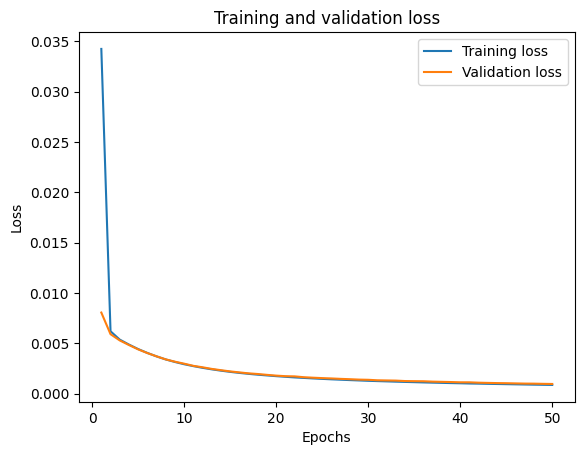

In [24]:
history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.figure()
plt.plot(epochs, loss_values, label='Training loss')
plt.plot(epochs, val_loss_values, label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Saving Data

In [147]:
model.save('soccer_player_nn.keras')

In [152]:
joblib.dump(encoder, 'target_encoder.pkl')

['target_encoder.pkl']

In [22]:
joblib.dump(feature_scaler, 'feature_scaler.pkl')

['feature_scaler.pkl']

In [158]:
networkdf.to_csv("embedding_pre_data.csv")

In [13]:
store = df.drop(['wage_eur', 'club_name','league_name','short_name', 'potential', 'height_cm', 'weight_kg', 'work_rate', 'body_type', 'defending_marking_awareness',
       'defending_standing_tackle', 'defending_sliding_tackle'], axis = 1)

In [14]:
store.head()

,long_name,player_positions,overall,value_eur,age,club_position,preferred_foot,weak_foot,skill_moves,international_reputation,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure
0,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,78000000.0,34,RW,Left,4,4,5,85.0,92.0,91.0,95.0,34.0,65.0,85,95,70,91,88,96,93,94,91,96,91,80,91,94,95,86,68,72,69,94,44,40,93,95,75,96
1,Robert Lewandowski,ST,92,119500000.0,32,ST,Right,4,4,5,78.0,92.0,79.0,86.0,44.0,82.0,71,95,90,85,89,85,79,85,70,88,77,79,77,93,82,90,85,76,86,87,81,49,95,81,90,88
2,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,45000000.0,36,ST,Right,4,5,5,87.0,94.0,80.0,88.0,34.0,75.0,87,95,90,80,86,88,81,84,77,88,85,88,86,94,74,94,95,77,77,93,63,29,95,76,88,95
3,Neymar da Silva Santos Júnior,"LW, CAM",91,129000000.0,29,LW,Right,5,5,5,91.0,83.0,86.0,94.0,37.0,63.0,85,83,63,86,86,95,88,87,81,95,93,89,96,89,84,80,64,81,53,81,63,37,86,90,93,93
6,Kylian Mbappé Lottin,"ST, LW",91,194000000.0,22,ST,Right,4,5,4,97.0,88.0,80.0,92.0,36.0,77.0,78,93,72,85,83,93,80,69,71,91,97,97,92,93,83,86,78,88,77,82,62,38,92,82,79,88


In [15]:
store.to_csv("players.csv")